In [1]:
import numpy as np 
import pandas as pd 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
from matplotlib.pyplot import pie, axis, show

In [2]:
data=pd.read_csv("C:\\Users\\warid\\OneDrive\\Desktop\\Thesis\\CATALIST\\data\\data3.csv")

In [3]:
data 

,serial,country,WHO region,Population number(000)2005,Population annual growth rate(%) 1995-2004,Population in urban areas(%) 2005,Population total fertility rate(per woman) 2000-2004,Adult literacy rate(%) 2005,Net primary school enrolment ratio(%) Boys 2001,Net primary school enrolment ratio(%) Girls 2001,Gross national income per capita(current US$) 2003,Population living below poverty line(% with <1 $ a day) 1990-2002
0,1,Afghanistan,EMR,29863,3.3,24,7.5,...,...,...,...,…
1,2,Albania,EUR,3130,-0.1,45,2.3,98.7,…,…,1740,<2
2,3,Algeria,AFR,32854,1.4,60,2.5,68.9,96.3,93.7,1890,<2
3,4,Andorra,EUR,67,0.4,91,...,...,...,...,...,…
4,5,Angola,AFR,15941,2.3,37,6.8,66.9,...,...,740,…
...,...,...,...,...,...,...,...,...,...,...,...,...
187,188,Venezuela,AMR,26749,1.8,88,2.7,93,92,92.7,3490,15
188,189,Viet Nam,WPR,84238,1.3,27,2.3,90.3,…,…,480,17.7
189,190,Yemen,EMR,20975,2.9,26,6.2,49,...,...,520,15.7
190,191,Zambia,AFR,11668,1.8,37,5.7,...,66.4,65.6,380,63.7


In [4]:
data.dtypes

serial                                                                 int64
country                                                               object
WHO region                                                            object
Population number(000)2005                                             int64
Population annual growth rate(%) 1995-2004                           float64
Population in urban areas(%) 2005                                      int64
Population total fertility rate(per woman) 2000-2004                  object
Adult literacy rate(%) 2005                                           object
Net primary school enrolment ratio(%) Boys 2001                       object
Net primary school enrolment ratio(%) Girls 2001                      object
Gross national income per capita(current US$) 2003                    object
Population living below poverty line(% with <1 $ a day) 1990-2002     object
dtype: object

In [5]:
data=data.rename(columns={'country':'country',
                            'WHO region':'WHO_region',
                            'Population number(000)2005':'Population2005',
                            'Population annual growth rate(%) 1995-2004':'Population_AGR_1995_2004',
                            'Population in urban areas(%) 2005':'PopulationUA_2005',
                            'Population total fertility rate(per woman) 2000-2004':'PopulationTFR_2000_2004',
                            'Adult literacy rate(%) 2005':'ALR_2005',
                            'Net primary school enrolment ratio(%) Boys 2001':'NPSER_Boys_2001',
                            'Net primary school enrolment ratio(%) Girls 2001':'NPSER_Girls_2001',
                            'Gross national income per capita(current US$) 2003':'GNIPC_2003',
                            'Population living below poverty line(% with <1 $ a day) 1990-2002':'PLBP_1990_2002'})

In [6]:
data.columns

Index(['serial', 'country', 'WHO_region', 'Population2005',
       'Population_AGR_1995_2004', 'PopulationUA_2005',
       'PopulationTFR_2000_2004', 'ALR_2005', 'NPSER_Boys_2001',
       'NPSER_Girls_2001', 'GNIPC_2003', 'PLBP_1990_2002'],
      dtype='object')

In [7]:
data.replace('…', 'NaN', inplace=True)

In [8]:
data.replace('...', 'NaN', inplace=True)

In [9]:
data.isnull().any()

serial                      False
country                     False
WHO_region                  False
Population2005              False
Population_AGR_1995_2004    False
PopulationUA_2005           False
PopulationTFR_2000_2004     False
ALR_2005                    False
NPSER_Boys_2001             False
NPSER_Girls_2001            False
GNIPC_2003                  False
PLBP_1990_2002              False
dtype: bool

In [10]:
data.replace('NaN', 0, inplace=True)

In [11]:
data.Population_AGR_1995_2004 = data.Population_AGR_1995_2004.astype(float)
data.Population_AGR_1995_2004 = data.Population_AGR_1995_2004.astype(int) 
data.PopulationTFR_2000_2004 = data.PopulationTFR_2000_2004.astype(float) 
data.ALR_2005 = data.ALR_2005.astype(float) 
data.GNIPC_2003 = data.GNIPC_2003.astype(int) 
data.NPSER_Girls_2001 = data.NPSER_Girls_2001.astype(float)
data.NPSER_Boys_2001 = data.NPSER_Boys_2001.astype(float)

In [12]:
data.dtypes

serial                        int64
country                      object
WHO_region                   object
Population2005                int64
Population_AGR_1995_2004      int32
PopulationUA_2005             int64
PopulationTFR_2000_2004     float64
ALR_2005                    float64
NPSER_Boys_2001             float64
NPSER_Girls_2001            float64
GNIPC_2003                    int32
PLBP_1990_2002               object
dtype: object

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 12 columns):
serial                      192 non-null int64
country                     192 non-null object
WHO_region                  192 non-null object
Population2005              192 non-null int64
Population_AGR_1995_2004    192 non-null int32
PopulationUA_2005           192 non-null int64
PopulationTFR_2000_2004     192 non-null float64
ALR_2005                    192 non-null float64
NPSER_Boys_2001             192 non-null float64
NPSER_Girls_2001            192 non-null float64
GNIPC_2003                  192 non-null int32
PLBP_1990_2002              192 non-null object
dtypes: float64(4), int32(2), int64(3), object(3)
memory usage: 16.6+ KB


In [14]:
data.describe()

,serial,Population2005,Population_AGR_1995_2004,PopulationUA_2005,PopulationTFR_2000_2004,ALR_2005,NPSER_Boys_2001,NPSER_Girls_2001,GNIPC_2003
count,192.000000,1.920000e+02,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,96.500000,3.357101e+04,0.984375,55.447917,3.010417,49.938021,59.214583,58.006250,4874.375000
std,55.569776,1.277508e+05,1.070678,23.162241,1.902931,41.487093,42.523821,42.327576,9183.805951
min,1.000000,1.000000e+00,-2.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.750000,1.568750e+03,0.000000,37.000000,1.600000,0.000000,0.000000,0.000000,297.500000
50%,96.500000,6.803000e+03,1.000000,56.500000,2.500000,62.650000,84.950000,83.000000,1090.000000
75%,144.250000,2.181150e+04,2.000000,73.000000,4.300000,90.900000,94.700000,94.025000,3790.000000
max,192.000000,1.315844e+06,5.000000,100.000000,7.900000,99.800000,100.000000,100.000000,43940.000000


In [15]:
import math

In [16]:
median = math.floor(data.NPSER_Boys_2001.median())
median

84

In [17]:
data.NPSER_Boys_2001.replace(0, '84', inplace=True)

In [18]:
median2 = math.floor(data.NPSER_Girls_2001.median())
median2

83

In [19]:
data.NPSER_Girls_2001.replace(0, '83', inplace=True)

In [20]:
data.NPSER_Girls_2001 = data.NPSER_Girls_2001.astype(float)
data.NPSER_Boys_2001 = data.NPSER_Boys_2001.astype(float)

In [21]:
data.dtypes

serial                        int64
country                      object
WHO_region                   object
Population2005                int64
Population_AGR_1995_2004      int32
PopulationUA_2005             int64
PopulationTFR_2000_2004     float64
ALR_2005                    float64
NPSER_Boys_2001             float64
NPSER_Girls_2001            float64
GNIPC_2003                    int32
PLBP_1990_2002               object
dtype: object

In [22]:
data.PopulationTFR_2000_2004

0      7.5
1      2.3
2      2.5
3      0.0
4      6.8
      ... 
187    2.7
188    2.3
189    6.2
190    5.7
191    3.6
Name: PopulationTFR_2000_2004, Length: 192, dtype: float64

In [23]:
median3 = math.floor(data.PopulationTFR_2000_2004.median())
median3

2

In [24]:
data.PopulationTFR_2000_2004.replace(0, '2', inplace=True)

In [25]:
data.PopulationTFR_2000_2004

0      7.5
1      2.3
2      2.5
3        2
4      6.8
      ... 
187    2.7
188    2.3
189    6.2
190    5.7
191    3.6
Name: PopulationTFR_2000_2004, Length: 192, dtype: object

In [26]:
median4 = math.floor(data.ALR_2005.median())
median4

62

In [27]:
data.ALR_2005.replace(0, '62', inplace=True)

In [28]:
median4 = math.floor(data.GNIPC_2003.median())
median4

1090

In [29]:
data.GNIPC_2003.replace(0, '62', inplace=True)

In [30]:
data.GNIPC_2003

0        62
1      1740
2      1890
3        62
4       740
       ... 
187    3490
188     480
189     520
190     380
191      62
Name: GNIPC_2003, Length: 192, dtype: object

In [31]:
data.dtypes

serial                        int64
country                      object
WHO_region                   object
Population2005                int64
Population_AGR_1995_2004      int32
PopulationUA_2005             int64
PopulationTFR_2000_2004      object
ALR_2005                     object
NPSER_Boys_2001             float64
NPSER_Girls_2001            float64
GNIPC_2003                   object
PLBP_1990_2002               object
dtype: object

In [32]:
data.replace('<2', 'NaN', inplace=True)

In [33]:
data.PLBP_1990_2002

0         0
1       NaN
2       NaN
3         0
4         0
       ... 
187      15
188    17.7
189    15.7
190    63.7
191      36
Name: PLBP_1990_2002, Length: 192, dtype: object

In [34]:
data.replace('NaN', 2, inplace=True)

In [35]:
data.PLBP_1990_2002

0         0
1         2
2         2
3         0
4         0
       ... 
187      15
188    17.7
189    15.7
190    63.7
191      36
Name: PLBP_1990_2002, Length: 192, dtype: object

In [36]:
data.PLBP_1990_2002 = data.PLBP_1990_2002.astype(float)
data.Population_AGR_1995_2004 = data.Population_AGR_1995_2004.astype(float)
data.Population_AGR_1995_2004 = data.Population_AGR_1995_2004.astype(int) 
data.PopulationTFR_2000_2004 = data.PopulationTFR_2000_2004.astype(float) 
data.ALR_2005 = data.ALR_2005.astype(float) 
data.GNIPC_2003 = data.GNIPC_2003.astype(int) 
data.NPSER_Girls_2001 = data.NPSER_Girls_2001.astype(float)
data.NPSER_Boys_2001 = data.NPSER_Boys_2001.astype(float)

In [37]:
data.dtypes

serial                        int64
country                      object
WHO_region                   object
Population2005                int64
Population_AGR_1995_2004      int32
PopulationUA_2005             int64
PopulationTFR_2000_2004     float64
ALR_2005                    float64
NPSER_Boys_2001             float64
NPSER_Girls_2001            float64
GNIPC_2003                    int32
PLBP_1990_2002              float64
dtype: object

In [38]:
data

,serial,country,WHO_region,Population2005,Population_AGR_1995_2004,PopulationUA_2005,PopulationTFR_2000_2004,ALR_2005,NPSER_Boys_2001,NPSER_Girls_2001,GNIPC_2003,PLBP_1990_2002
0,1,Afghanistan,EMR,29863,3,24,7.5,62.0,84.0,83.0,62,0.0
1,2,Albania,EUR,3130,0,45,2.3,98.7,84.0,83.0,1740,2.0
2,3,Algeria,AFR,32854,1,60,2.5,68.9,96.3,93.7,1890,2.0
3,4,Andorra,EUR,67,0,91,2.0,62.0,84.0,83.0,62,0.0
4,5,Angola,AFR,15941,2,37,6.8,66.9,84.0,83.0,740,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
187,188,Venezuela,AMR,26749,1,88,2.7,93.0,92.0,92.7,3490,15.0
188,189,Viet Nam,WPR,84238,1,27,2.3,90.3,84.0,83.0,480,17.7
189,190,Yemen,EMR,20975,2,26,6.2,49.0,84.0,83.0,520,15.7
190,191,Zambia,AFR,11668,1,37,5.7,62.0,66.4,65.6,380,63.7


In [39]:
data.to_csv('hrdata_modified2222.csv')

In [40]:
Who_region_AFR=data[(data['WHO_region']=='AFR')]
Who_region_AMR=data[(data['WHO_region']=='AMR')]
Who_region_EMR=data[(data['WHO_region']=='EMR')]
Who_region_EUR=data[(data['WHO_region']=='EUR')]
Who_region_SEAR=data[(data['WHO_region']=='SEAR')]
Who_region_WPR=data[(data['WHO_region']=='WPR')]

In [41]:
Who_region_AFR_number = Who_region_AFR.country.count()
Who_region_AMR_number = Who_region_AMR.country.count()
Who_region_EMR_number = Who_region_EMR.country.count()
Who_region_EUR_number = Who_region_EUR.country.count()
Who_region_SEAR_number = Who_region_SEAR.country.count()
Who_region_WPR_number = Who_region_WPR.country.count()
print("AFR Total countrys : ",Who_region_AFR_number)
print("AMR Total countrys : ",Who_region_AMR_number)
print("EMR Total countrys : ",Who_region_EMR_number)
print("EUR Total countrys : ",Who_region_EUR_number)
print("SEAR Total countrys : ",Who_region_SEAR_number)
print("WPR Total countrys : ",Who_region_WPR_number)

AFR Total countrys :  46
AMR Total countrys :  35
EMR Total countrys :  21
EUR Total countrys :  52
SEAR Total countrys :  11
WPR Total countrys :  27


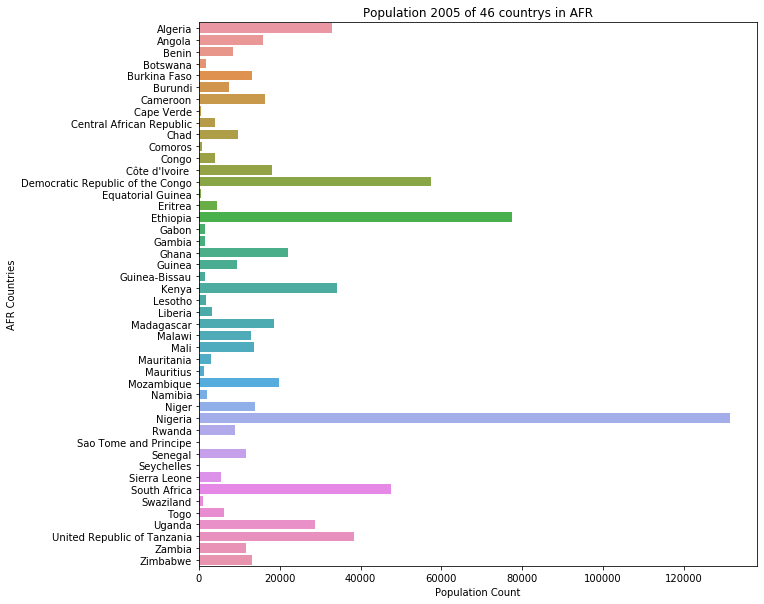

In [42]:
plt.figure(figsize=(10,10))
sns.barplot(y=Who_region_AFR.country,x=Who_region_AFR.Population2005)
plt.xlabel('Population Count')
plt.ylabel('AFR Countries')
plt.title('Population 2005 of 46 countrys in AFR')
plt.show()

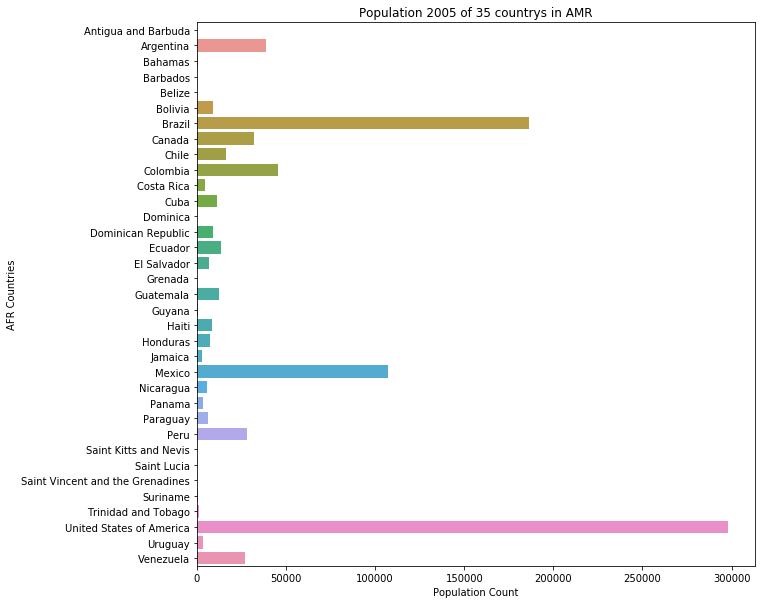

In [43]:
plt.figure(figsize=(10,10))
sns.barplot(y=Who_region_AMR.country,x=Who_region_AMR.Population2005)
plt.xlabel('Population Count')
plt.ylabel('AFR Countries')
plt.title('Population 2005 of 35 countrys in AMR')
plt.show()

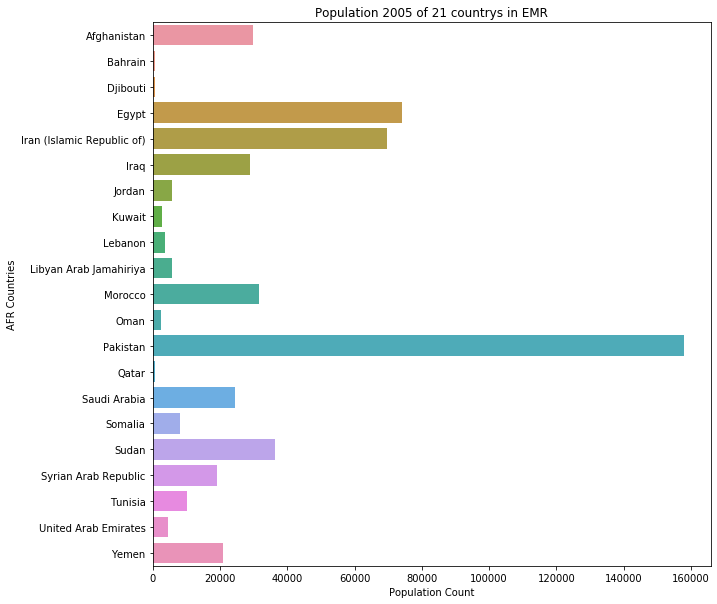

In [44]:
plt.figure(figsize=(10,10))
sns.barplot(y=Who_region_EMR.country,x=Who_region_EMR.Population2005)
plt.xlabel('Population Count')
plt.ylabel('AFR Countries')
plt.title('Population 2005 of 21 countrys in EMR')
plt.show()

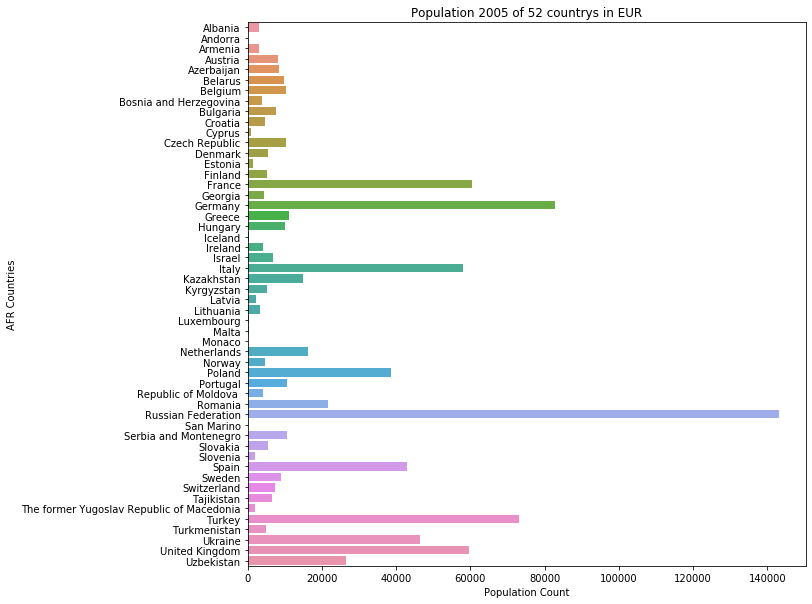

In [45]:
plt.figure(figsize=(10,10))
sns.barplot(y=Who_region_EUR.country,x=Who_region_EUR.Population2005)
plt.xlabel('Population Count')
plt.ylabel('AFR Countries')
plt.title('Population 2005 of 52 countrys in EUR')
plt.show()

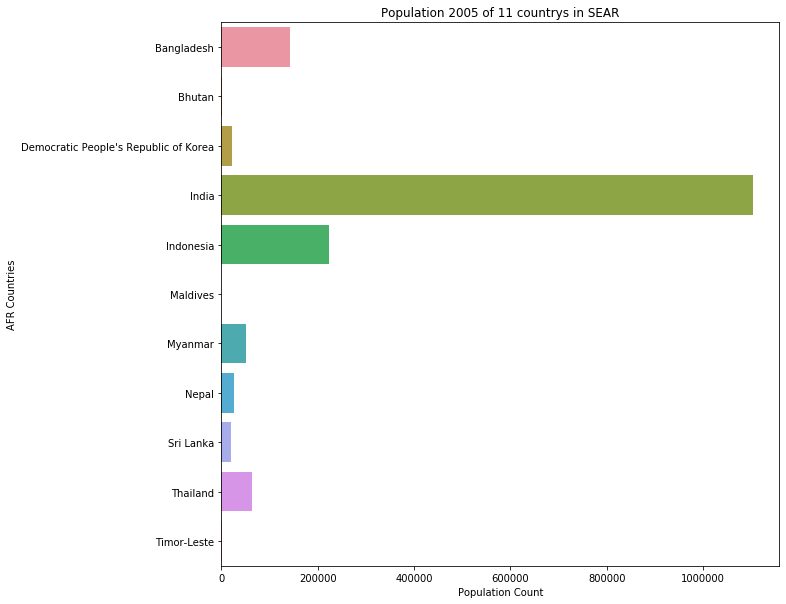

In [46]:
plt.figure(figsize=(10,10))
sns.barplot(y=Who_region_SEAR.country,x=Who_region_SEAR.Population2005)
plt.xlabel('Population Count')
plt.ylabel('AFR Countries')
plt.title('Population 2005 of 11 countrys in SEAR')
plt.show()

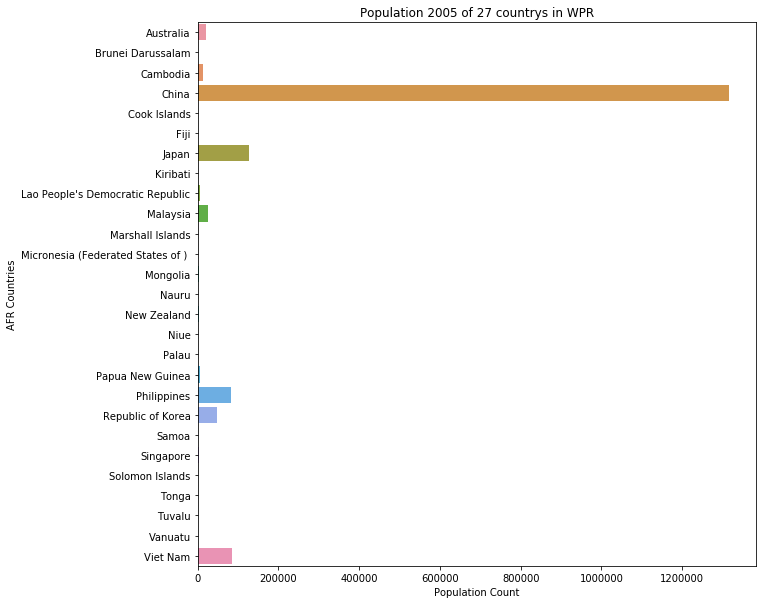

In [47]:
plt.figure(figsize=(10,10))
sns.barplot(y=Who_region_WPR.country,x=Who_region_WPR.Population2005)
plt.xlabel('Population Count')
plt.ylabel('AFR Countries')
plt.title('Population 2005 of 27 countrys in WPR')
plt.show()

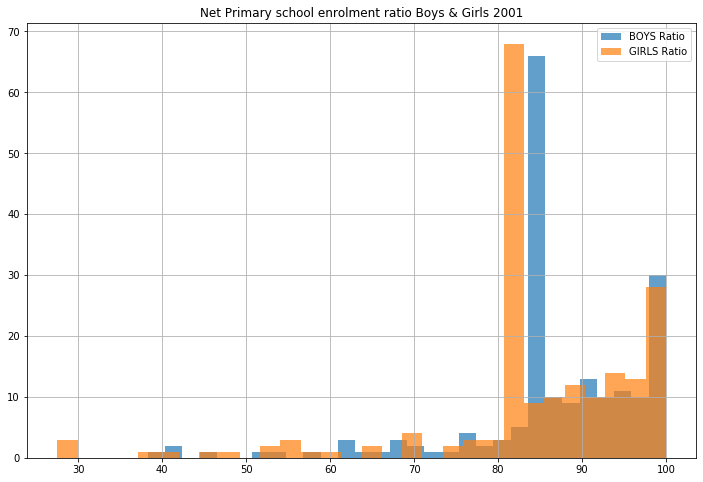

In [48]:
boys = data.NPSER_Boys_2001
girls = data.NPSER_Girls_2001
fig = plt.figure(figsize=(12,8))
boys.hist(alpha = 0.7, bins = 30, label='BOYS Ratio')
girls.hist(alpha = 0.7, bins = 30, label='GIRLS Ratio')
plt.title("Net Primary school enrolment ratio Boys & Girls 2001")
plt.legend(loc= "upper right")

In [49]:
red_blue = ["#195B5E","#EF4836"]
palette = sns.color_palette(red_blue)
sns.set_palette(palette)
sns.set_style("white")

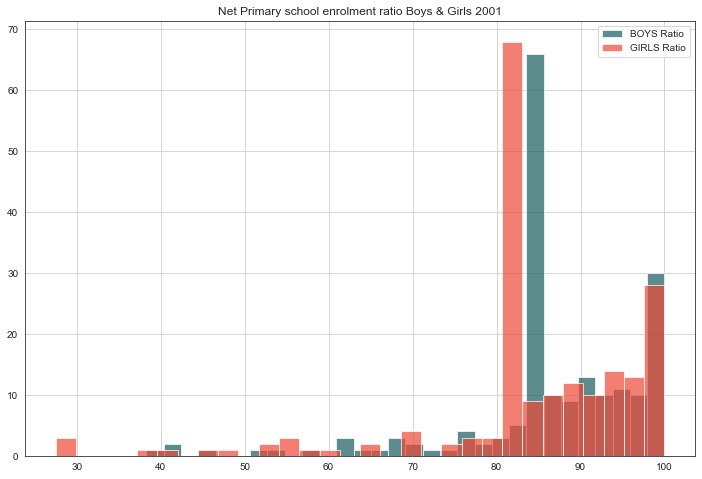

In [50]:
boys = data.NPSER_Boys_2001
girls = data.NPSER_Girls_2001
fig = plt.figure(figsize=(12,8))
boys.hist(alpha = 0.7, bins = 30, label='BOYS Ratio')
girls.hist(alpha = 0.7, bins = 30, label='GIRLS Ratio')
plt.title("Net Primary school enrolment ratio Boys & Girls 2001")
plt.legend(loc= "upper right")


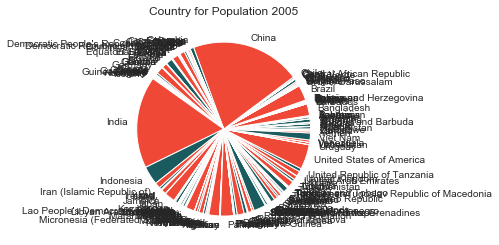

<Figure size 7200x7200 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [51]:
country = data['country']
plt.pie(data['Population2005'],labels=country)
plt.title('Country for Population 2005')
plt.figure(figsize=(100,100))
plt.show()
plt.savefig("Total population and countrys.png",bbox_inches = "tight", pad_inches =2 , transparent = True)


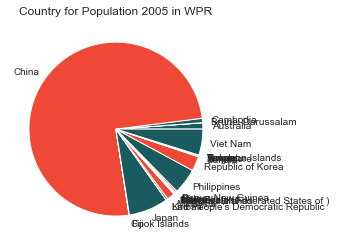

<Figure size 7200x7200 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [52]:
country = Who_region_WPR.country
population = Who_region_WPR.Population2005
plt.pie(population,labels=country)
plt.title('Country for Population 2005 in WPR')
plt.figure(figsize=(100,100))
plt.show()
plt.savefig("Country for Population 2005 in WPR.png",bbox_inches = "tight", pad_inches =2 , transparent = True)

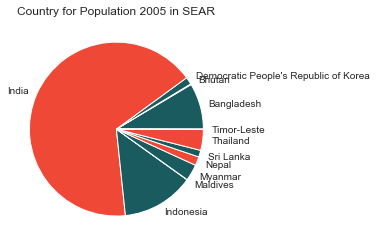

<Figure size 7200x7200 with 0 Axes>

In [53]:
country = Who_region_SEAR.country
population = Who_region_SEAR.Population2005
plt.pie(population,labels=country) 
plt.title('Country for Population 2005 in SEAR')
plt.figure(figsize=(100,100))
plt.show()

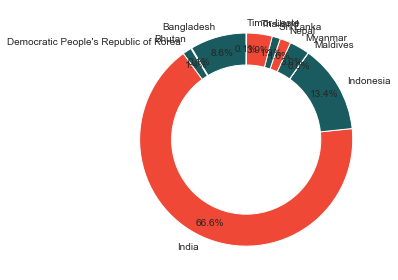

In [54]:
plt.pie(Who_region_SEAR.Population2005,labels= Who_region_SEAR.country,  autopct='%1.1f%%', startangle=90, pctdistance=.85)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
#ax1.axis('equal')
plt.tight_layout()
plt.show()

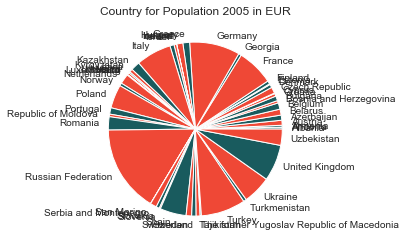

<Figure size 7200x7200 with 0 Axes>

In [55]:
country = Who_region_EUR.country
population = Who_region_EUR.Population2005
plt.pie(population,labels=country) 
plt.title('Country for Population 2005 in EUR')
plt.get_cmap('bwr')
plt.figure(figsize=(100,100))
plt.show()

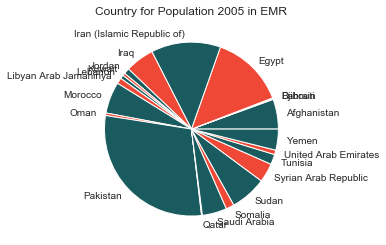

<Figure size 7200x7200 with 0 Axes>

In [56]:
country = Who_region_EMR.country
population = Who_region_EMR.Population2005
plt.pie(population,labels=country) 
plt.title('Country for Population 2005 in EMR')
plt.get_cmap('bwr')
plt.figure(figsize=(100,100))
plt.show()

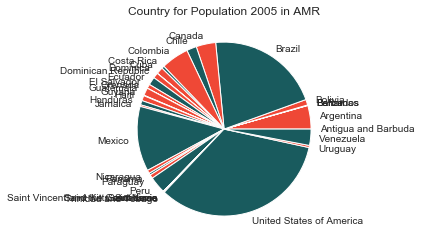

<Figure size 7200x7200 with 0 Axes>

In [57]:
country = Who_region_AMR.country
population = Who_region_AMR.Population2005
plt.pie(population,labels=country) 
plt.title('Country for Population 2005 in AMR')
plt.get_cmap('bwr')
plt.figure(figsize=(100,100))
plt.show()

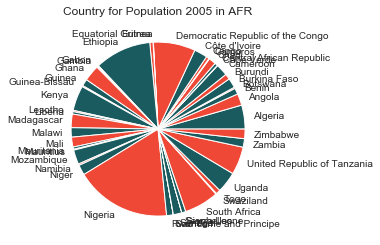

<Figure size 7200x7200 with 0 Axes>

In [58]:
country = Who_region_AFR.country
population = Who_region_AFR.Population2005
plt.pie(population,labels=country) 
plt.title('Country for Population 2005 in AFR')
plt.get_cmap('bwr')
plt.figure(figsize=(100,100))
plt.show()

In [59]:
boys = data.NPSER_Boys_2001.sum()
girls = data.NPSER_Girls_2001.sum()
print("Boys: ",boys)
print("Girls: ",girls)

Boys:  16577.199999999997
Girls:  16283.2


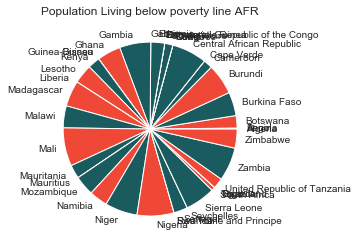

<Figure size 7200x7200 with 0 Axes>

In [60]:
country = Who_region_AFR.country
population = Who_region_AFR.PLBP_1990_2002
plt.pie(population,labels=country) 
plt.title('Population Living below poverty line AFR')
plt.get_cmap('bwr')
plt.figure(figsize=(100,100))
plt.show()

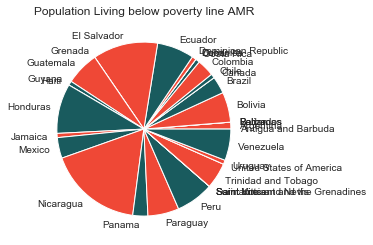

<Figure size 7200x7200 with 0 Axes>

In [61]:
country = Who_region_AMR.country
population = Who_region_AMR.PLBP_1990_2002
plt.pie(population,labels=country) 
plt.title('Population Living below poverty line AMR')
plt.get_cmap('bwr')
plt.figure(figsize=(100,100))
plt.show()

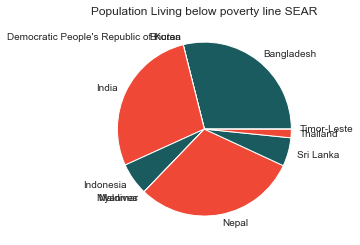

<Figure size 7200x7200 with 0 Axes>

In [62]:
country = Who_region_SEAR.country
population = Who_region_SEAR.PLBP_1990_2002
plt.pie(population,labels=country) 
plt.title('Population Living below poverty line SEAR')
plt.get_cmap('bwr')
plt.figure(figsize=(100,100))
plt.show()

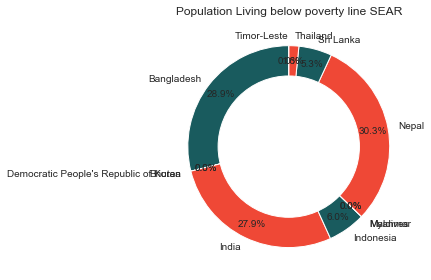

In [63]:
plt.pie(Who_region_SEAR.PLBP_1990_2002,labels= Who_region_SEAR.country,  autopct='%1.1f%%', startangle=90, pctdistance=.85)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
plt.title('Population Living below poverty line SEAR')
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
#ax1.axis('equal')
plt.tight_layout()
plt.show()

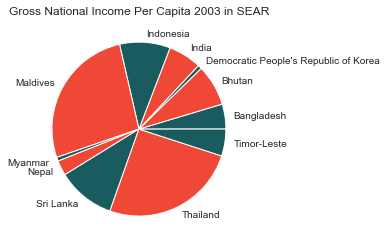

<Figure size 7200x7200 with 0 Axes>

In [64]:
country = Who_region_SEAR.country
population = Who_region_SEAR.GNIPC_2003
plt.pie(population,labels=country) 
plt.title('Gross National Income Per Capita 2003 in SEAR')
plt.get_cmap('bwr')
plt.figure(figsize=(100,100))
plt.show()

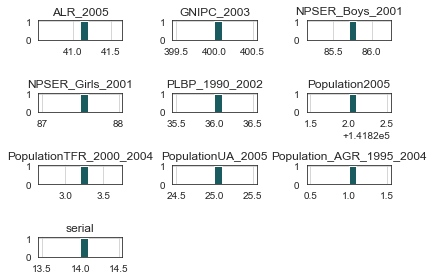

<Figure size 7200x7200 with 0 Axes>

In [65]:
data[data['country']=='Bangladesh'].hist()
plt.tight_layout()
plt.figure(figsize=(100,100))
plt.show()

In [66]:
#1DE9B6
#00BFA5
#EF6C00
#1DE9B6
red_blue = ["#EF6C00","#1DE9B6"]
palette = sns.color_palette(red_blue)
sns.set_palette(palette)
sns.set_style("white")

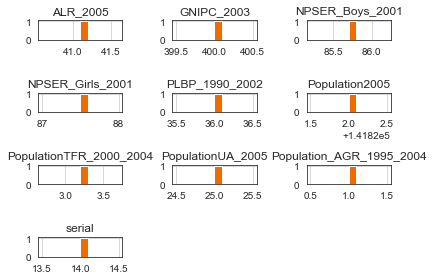

<Figure size 7200x7200 with 0 Axes>

In [67]:
data[data['country']=='Bangladesh'].hist()
plt.tight_layout()
plt.figure(figsize=(100,100))
plt.show()

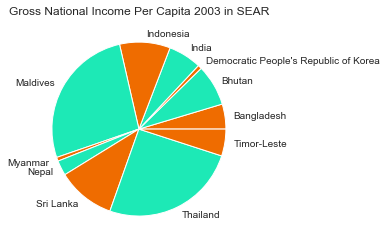

<Figure size 7200x7200 with 0 Axes>

In [68]:
country = Who_region_SEAR.country
population = Who_region_SEAR.GNIPC_2003
plt.pie(population,labels=country) 
plt.title('Gross National Income Per Capita 2003 in SEAR')
plt.get_cmap('bwr')
plt.figure(figsize=(100,100))
plt.show()

In [69]:
PANG_group = data.groupby(data['Population_AGR_1995_2004'])
PANG_group

In [70]:
PANG_group.mean()

,serial,Population2005,PopulationUA_2005,PopulationTFR_2000_2004,ALR_2005,NPSER_Boys_2001,NPSER_Girls_2001,GNIPC_2003,PLBP_1990_2002
Population_AGR_1995_2004,,,,,,,,,
-2,125.000000,1.000000,37.000000,2.000000,62.000000,84.000000,83.000000,62.000000,0.000000
-1,52.500000,2246.000000,62.500000,1.750000,62.000000,87.450000,86.750000,446.000000,1.350000
0,103.945946,36809.594595,61.094595,1.981081,78.132432,90.968919,90.729730,9432.513514,3.185135
1,92.264151,51099.490566,58.169811,2.941509,74.432075,87.903774,86.401887,3382.301887,10.950943
2,91.566038,17559.830189,46.075472,4.754717,65.692453,80.349057,77.569811,1098.452830,15.507547
3,53.750000,14492.500000,23.500000,6.900000,42.350000,60.050000,49.125000,175.500000,15.350000
4,108.333333,2261.000000,78.666667,4.066667,74.333333,88.100000,86.966667,84.666667,0.000000
5,161.500000,6767.000000,54.000000,4.100000,70.650000,82.350000,82.400000,141.000000,0.000000


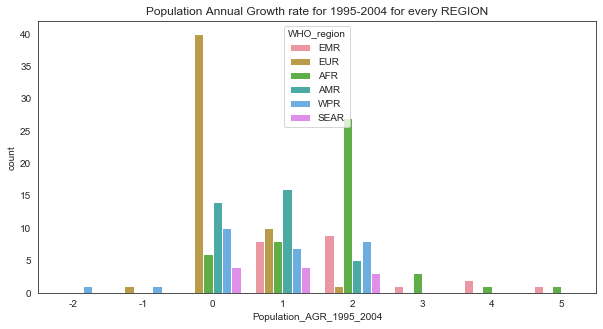

In [71]:
plt.figure(figsize=(10,5))
sns.countplot(data.Population_AGR_1995_2004,hue=data.WHO_region)
plt.title('Population Annual Growth rate for 1995-2004 for every REGION')
plt.show()

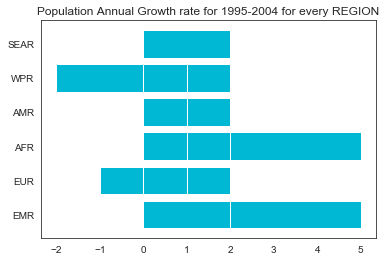

In [72]:
plt.barh(data.WHO_region, data.Population_AGR_1995_2004, data=data,color='#00B8D4')
#sns.despine(left=True, bottom=True)
# Show the plot
plt.title('Population Annual Growth rate for 1995-2004 for every REGION')
plt.show()

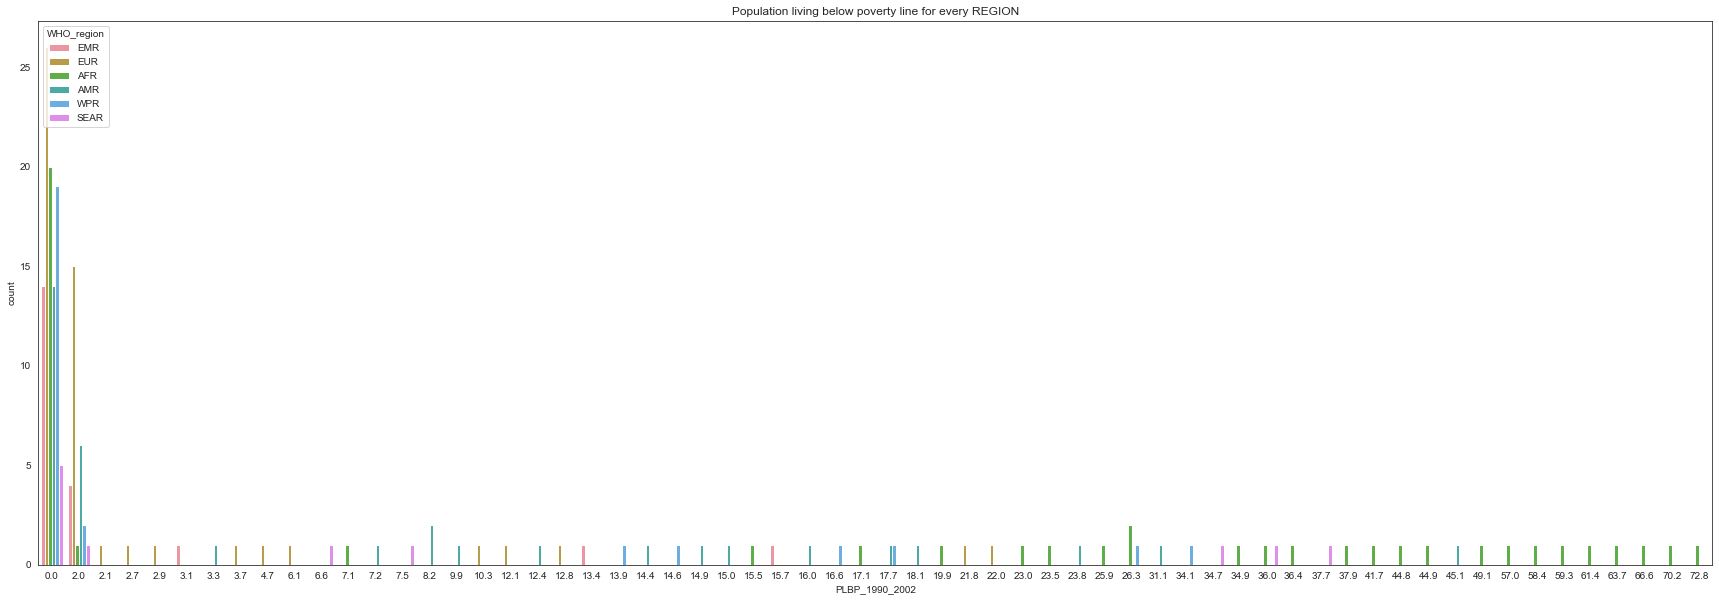

In [73]:
plt.figure(figsize=(30,10))
sns.countplot(data.PLBP_1990_2002,hue=data.WHO_region)
plt.title('Population living below poverty line for every REGION')
plt.show()

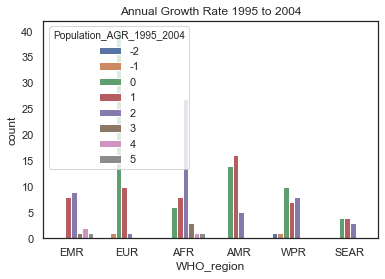

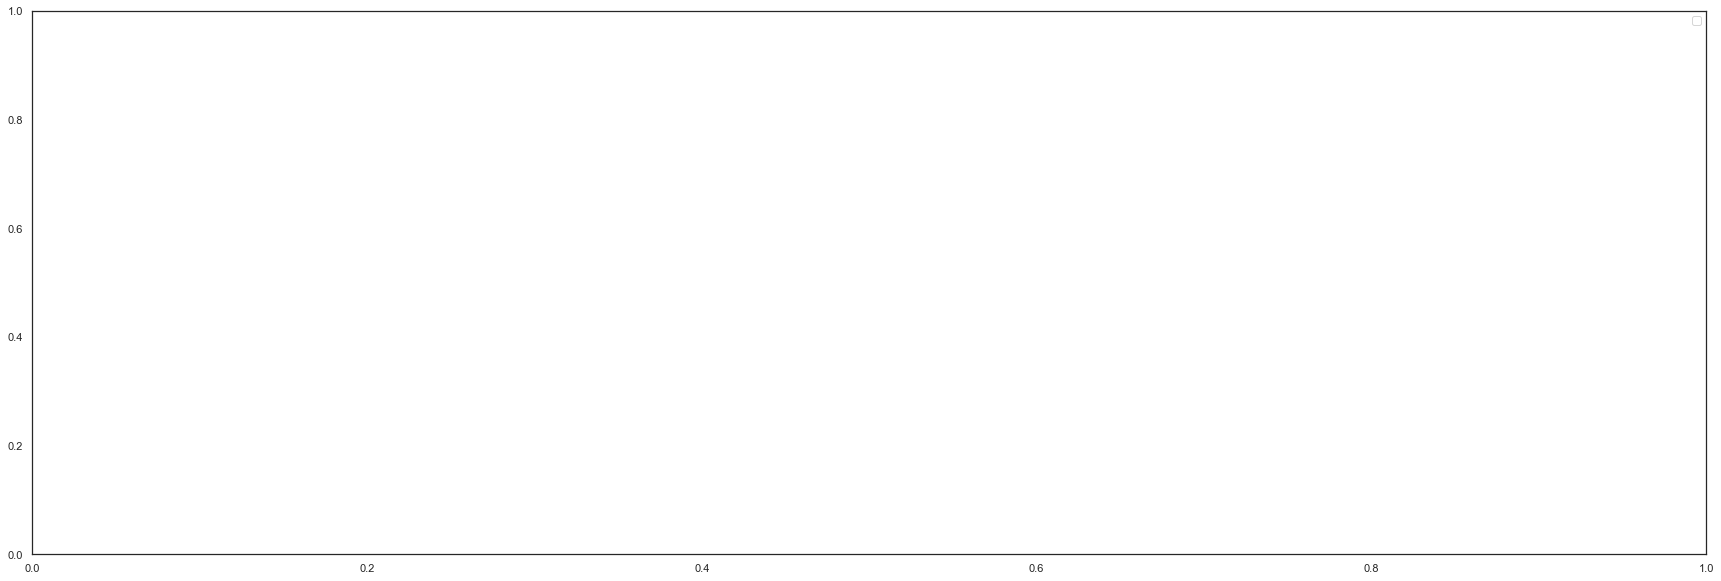

In [137]:
sns.countplot(data.WHO_region,hue=data.Population_AGR_1995_2004)
plt.title('Annual Growth Rate 1995 to 2004') 
plt.figure(figsize=(30,10))
plt.legend('right')
plt.show()

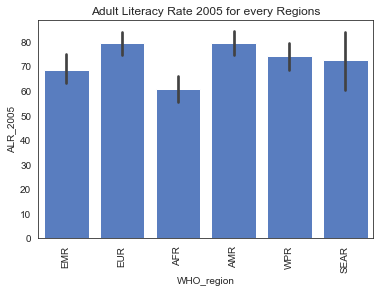

In [75]:
sns.set_color_codes("muted")
sns.barplot(x=data.WHO_region, y=data.ALR_2005, data=data,
            label="Year Suicides", color="b")
plt.title('Adult Literacy Rate 2005 for every Regions')
plt.xticks(rotation=90)
plt.show()

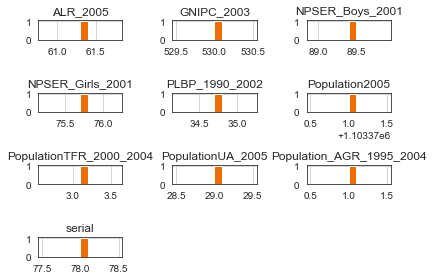

In [76]:
data[data['country']=='India'].hist()
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Net Primary School Enrolement Ratio Boys & Girls 2001')

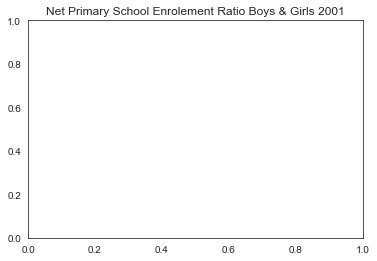

In [77]:
plt.title('Net Primary School Enrolement Ratio Boys & Girls 2001')

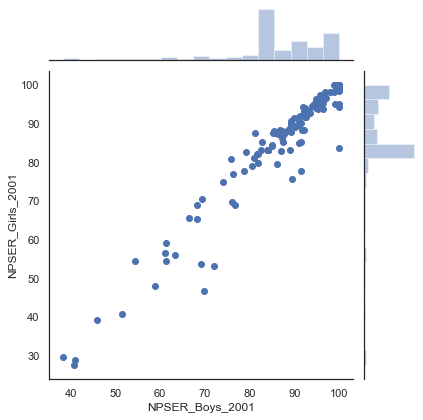

In [78]:
np.random.seed(0)
sns.set(style="white", color_codes=True)
g = sns.jointplot(x=data.NPSER_Boys_2001, y=data.NPSER_Girls_2001, data=data) 

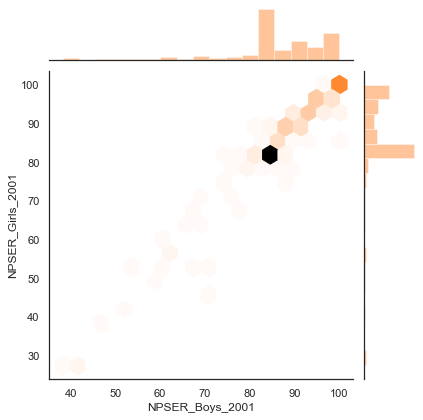

In [79]:
sns.jointplot(x=data.NPSER_Boys_2001, y=data.NPSER_Girls_2001, kind="hex", color='#FF6D00')

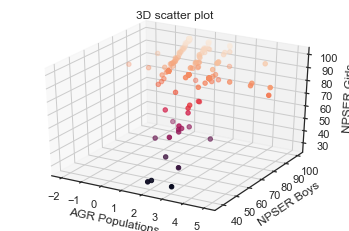

In [80]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#colored by the z values
ax.scatter(data.Population_AGR_1995_2004, data.NPSER_Boys_2001, data.NPSER_Girls_2001, c= data.NPSER_Girls_2001)

ax.set_xlabel('AGR Populations')
ax.set_ylabel('NPSER Boys')
ax.set_zlabel('NPSER Girls')

plt.title('3D scatter plot')
plt.show()

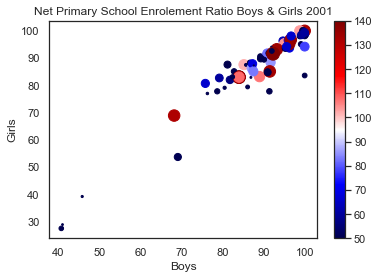

In [81]:
z = np.random.randn(192)*70
plt.scatter(data.NPSER_Boys_2001, data.NPSER_Girls_2001, cmap='prism_r', c=z, s=z, vmin=50, vmax=140)
plt.xlabel('Boys')
plt.ylabel('Girls')
plt.title('Net Primary School Enrolement Ratio Boys & Girls 2001')
cb = plt.colorbar()
cb.set_clim(20,80)
plt.set_cmap("seismic")
plt.show()

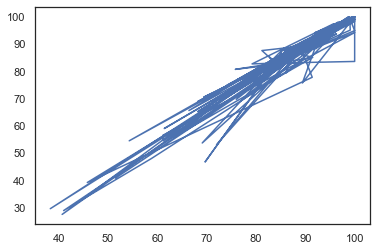

In [82]:
plt.plot(data['NPSER_Boys_2001'], data['NPSER_Girls_2001'])

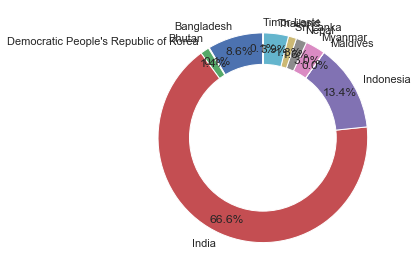

In [83]:
plt.pie(Who_region_SEAR.Population2005,labels= Who_region_SEAR.country,  autopct='%1.1f%%', startangle=90, pctdistance=.85)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.show()

In [84]:
data.head()

,serial,country,WHO_region,Population2005,Population_AGR_1995_2004,PopulationUA_2005,PopulationTFR_2000_2004,ALR_2005,NPSER_Boys_2001,NPSER_Girls_2001,GNIPC_2003,PLBP_1990_2002
0,1,Afghanistan,EMR,29863,3,24,7.5,62.0,84.0,83.0,62,0.0
1,2,Albania,EUR,3130,0,45,2.3,98.7,84.0,83.0,1740,2.0
2,3,Algeria,AFR,32854,1,60,2.5,68.9,96.3,93.7,1890,2.0
3,4,Andorra,EUR,67,0,91,2.0,62.0,84.0,83.0,62,0.0
4,5,Angola,AFR,15941,2,37,6.8,66.9,84.0,83.0,740,0.0


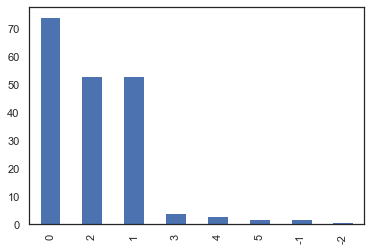

In [85]:
data['Population_AGR_1995_2004'].value_counts().plot(kind='bar')

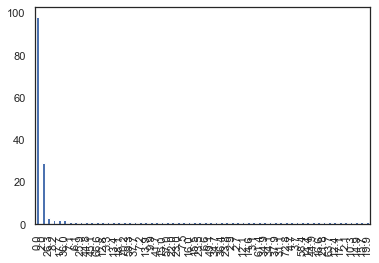

In [86]:
data['PLBP_1990_2002'].value_counts().plot(kind='bar')

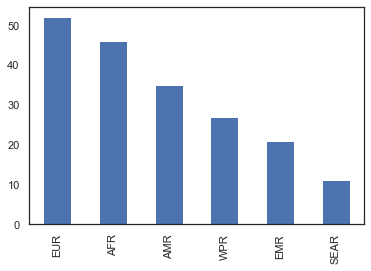

In [87]:
data['WHO_region'].value_counts().plot(kind='bar')

(array([95.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 1. ,  7.1, 13.2, 19.3, 25.4, 31.5, 37.6, 43.7, 49.8, 55.9, 62. ]),
 <a list of 10 Patch objects>)

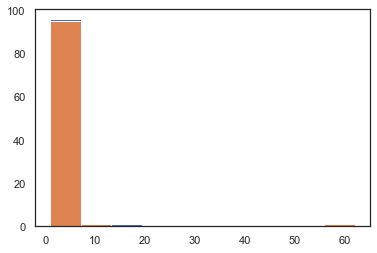

In [88]:
plt.hist(data.NPSER_Boys_2001.value_counts())
plt.hist(data.NPSER_Girls_2001.value_counts())

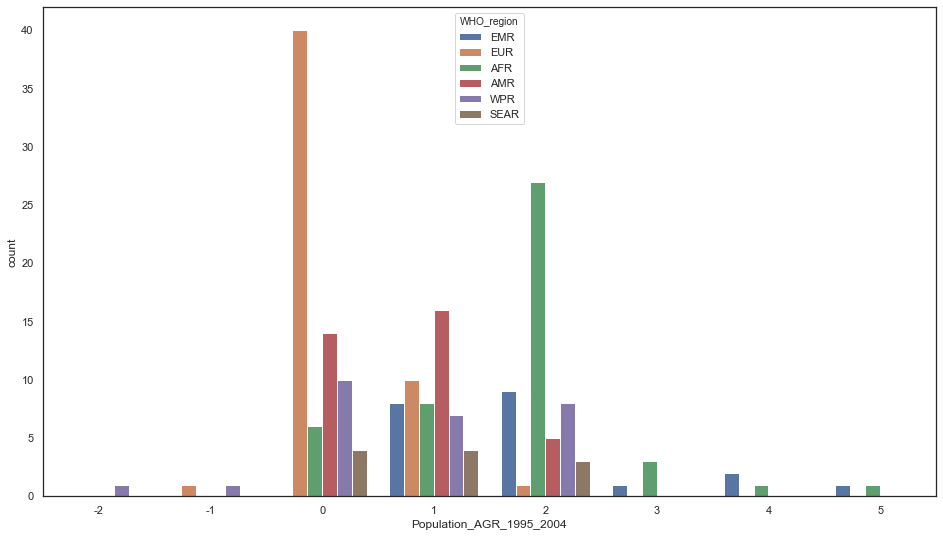

In [89]:
plt.figure(figsize=(16,9))
ax=sns.countplot(x=data['Population_AGR_1995_2004'],hue=data['WHO_region'])

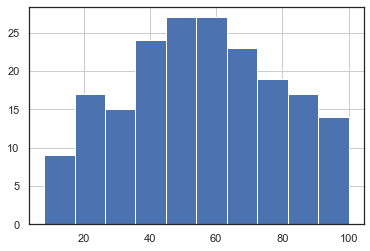

In [90]:
data['PopulationUA_2005'].hist()

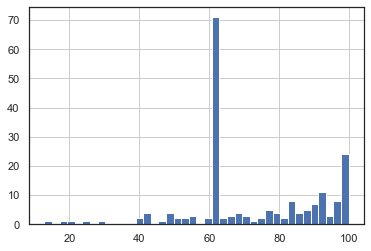

In [91]:
data['ALR_2005'].hist(bins=40)

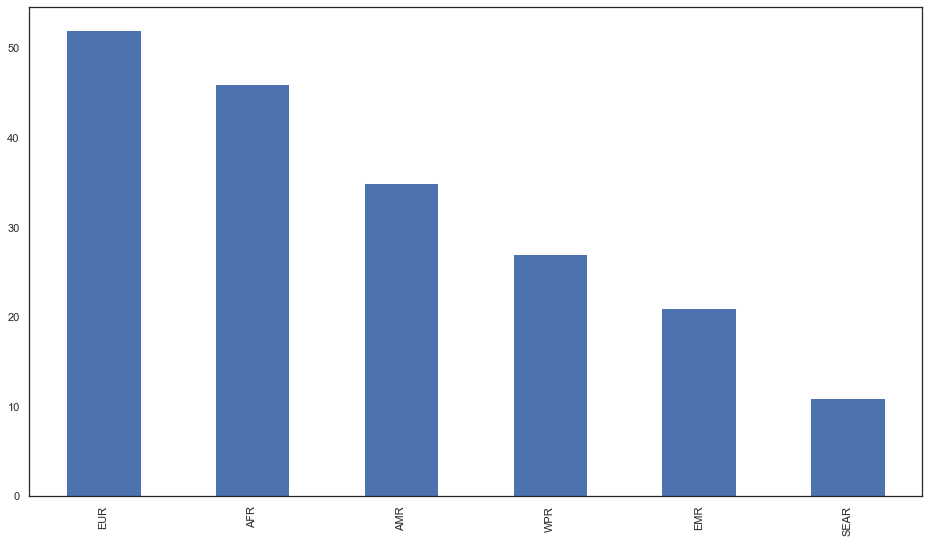

In [92]:
plt.figure(figsize=(16,9))
data['WHO_region'].value_counts().plot(kind='bar')

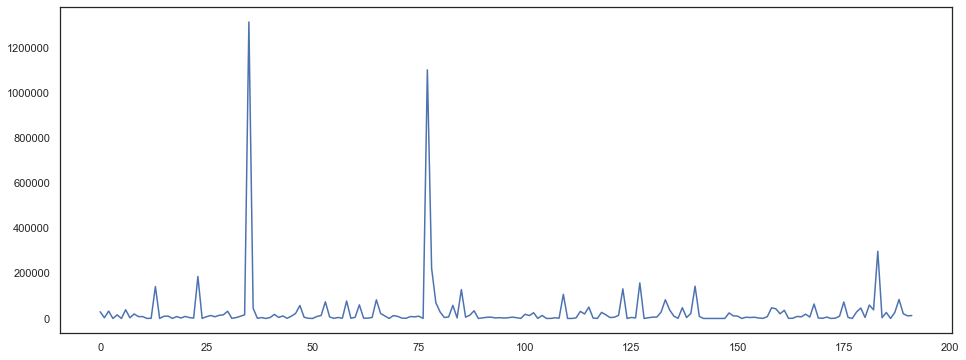

In [93]:
plt.figure(figsize=(16,6))
sns.lineplot(data=data.Population2005)

Text(0.5, 1.0, 'Male and female count for every country')

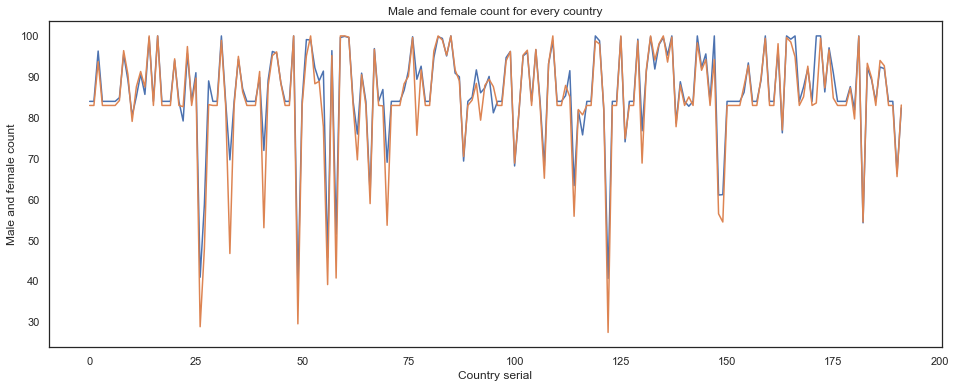

In [94]:
plt.figure(figsize=(16,6))
sns.lineplot(data = data.NPSER_Boys_2001)
sns.lineplot(data = data.NPSER_Girls_2001)
plt.xlabel('Country serial')
plt.ylabel('Male and female count')
plt.title('Male and female count for every country')

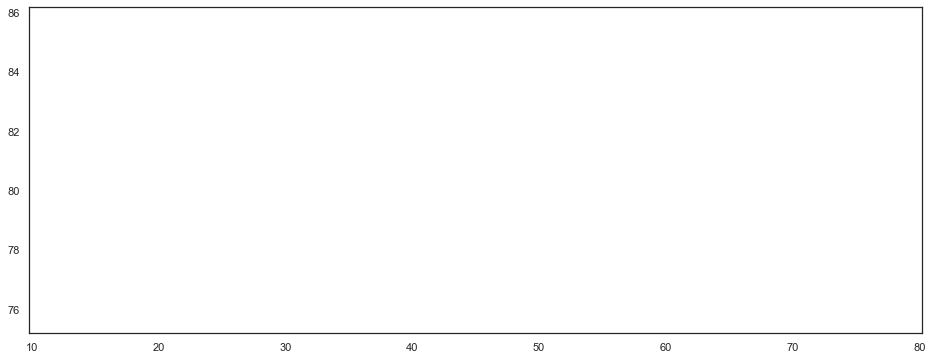

In [95]:
ban = data[data['country']=='Bangladesh']
ind = data[data['country'] == 'India']
plt.figure(figsize=(16,6))
sns.lineplot(data = ban['NPSER_Boys_2001'])
sns.lineplot(data = ind['NPSER_Girls_2001'])

In [96]:
ban = data[data['country']=='Bangladesh']
ban

,serial,country,WHO_region,Population2005,Population_AGR_1995_2004,PopulationUA_2005,PopulationTFR_2000_2004,ALR_2005,NPSER_Boys_2001,NPSER_Girls_2001,GNIPC_2003,PLBP_1990_2002
13,14,Bangladesh,SEAR,141822,1,25,3.2,41.1,85.7,87.5,400,36.0


In [97]:
ind = data[data['country'] == 'India']

In [98]:
ind.Population2005

77    1103371
Name: Population2005, dtype: int64

Text(0.5, 0, 'Country serial Number')

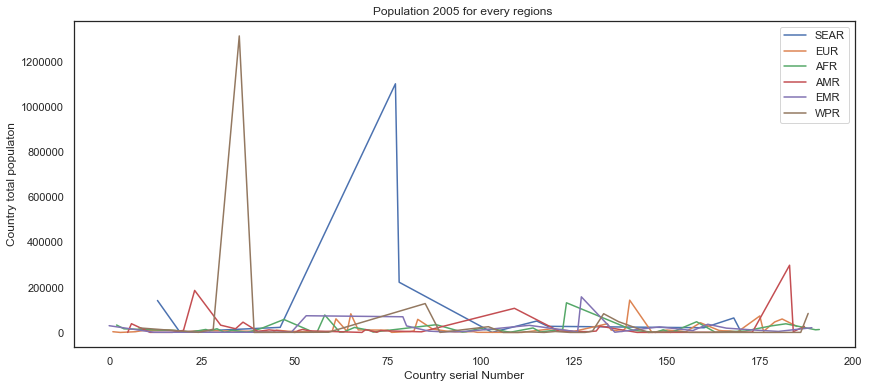

In [99]:
plt.figure(figsize=(14,6))
plt.title("Population 2005 for every regions ")
sns.lineplot(data=Who_region_SEAR['Population2005'], label="SEAR")
sns.lineplot(data=Who_region_EUR['Population2005'], label="EUR")
sns.lineplot(data=Who_region_AFR['Population2005'], label="AFR")
sns.lineplot(data=Who_region_AMR['Population2005'], label="AMR")
sns.lineplot(data=Who_region_EMR['Population2005'], label="EMR")
sns.lineplot(data=Who_region_WPR['Population2005'], label="WPR")
plt.ylabel("Country total populaton")
plt.xlabel("Country serial Number")

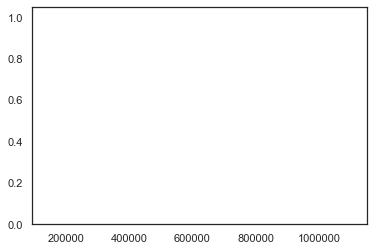

In [100]:
plt.hist(ind.Population2005)
plt.hist(ban.Population2005)
plt.show() 

In [101]:
ban.Population2005

13    141822
Name: Population2005, dtype: int64

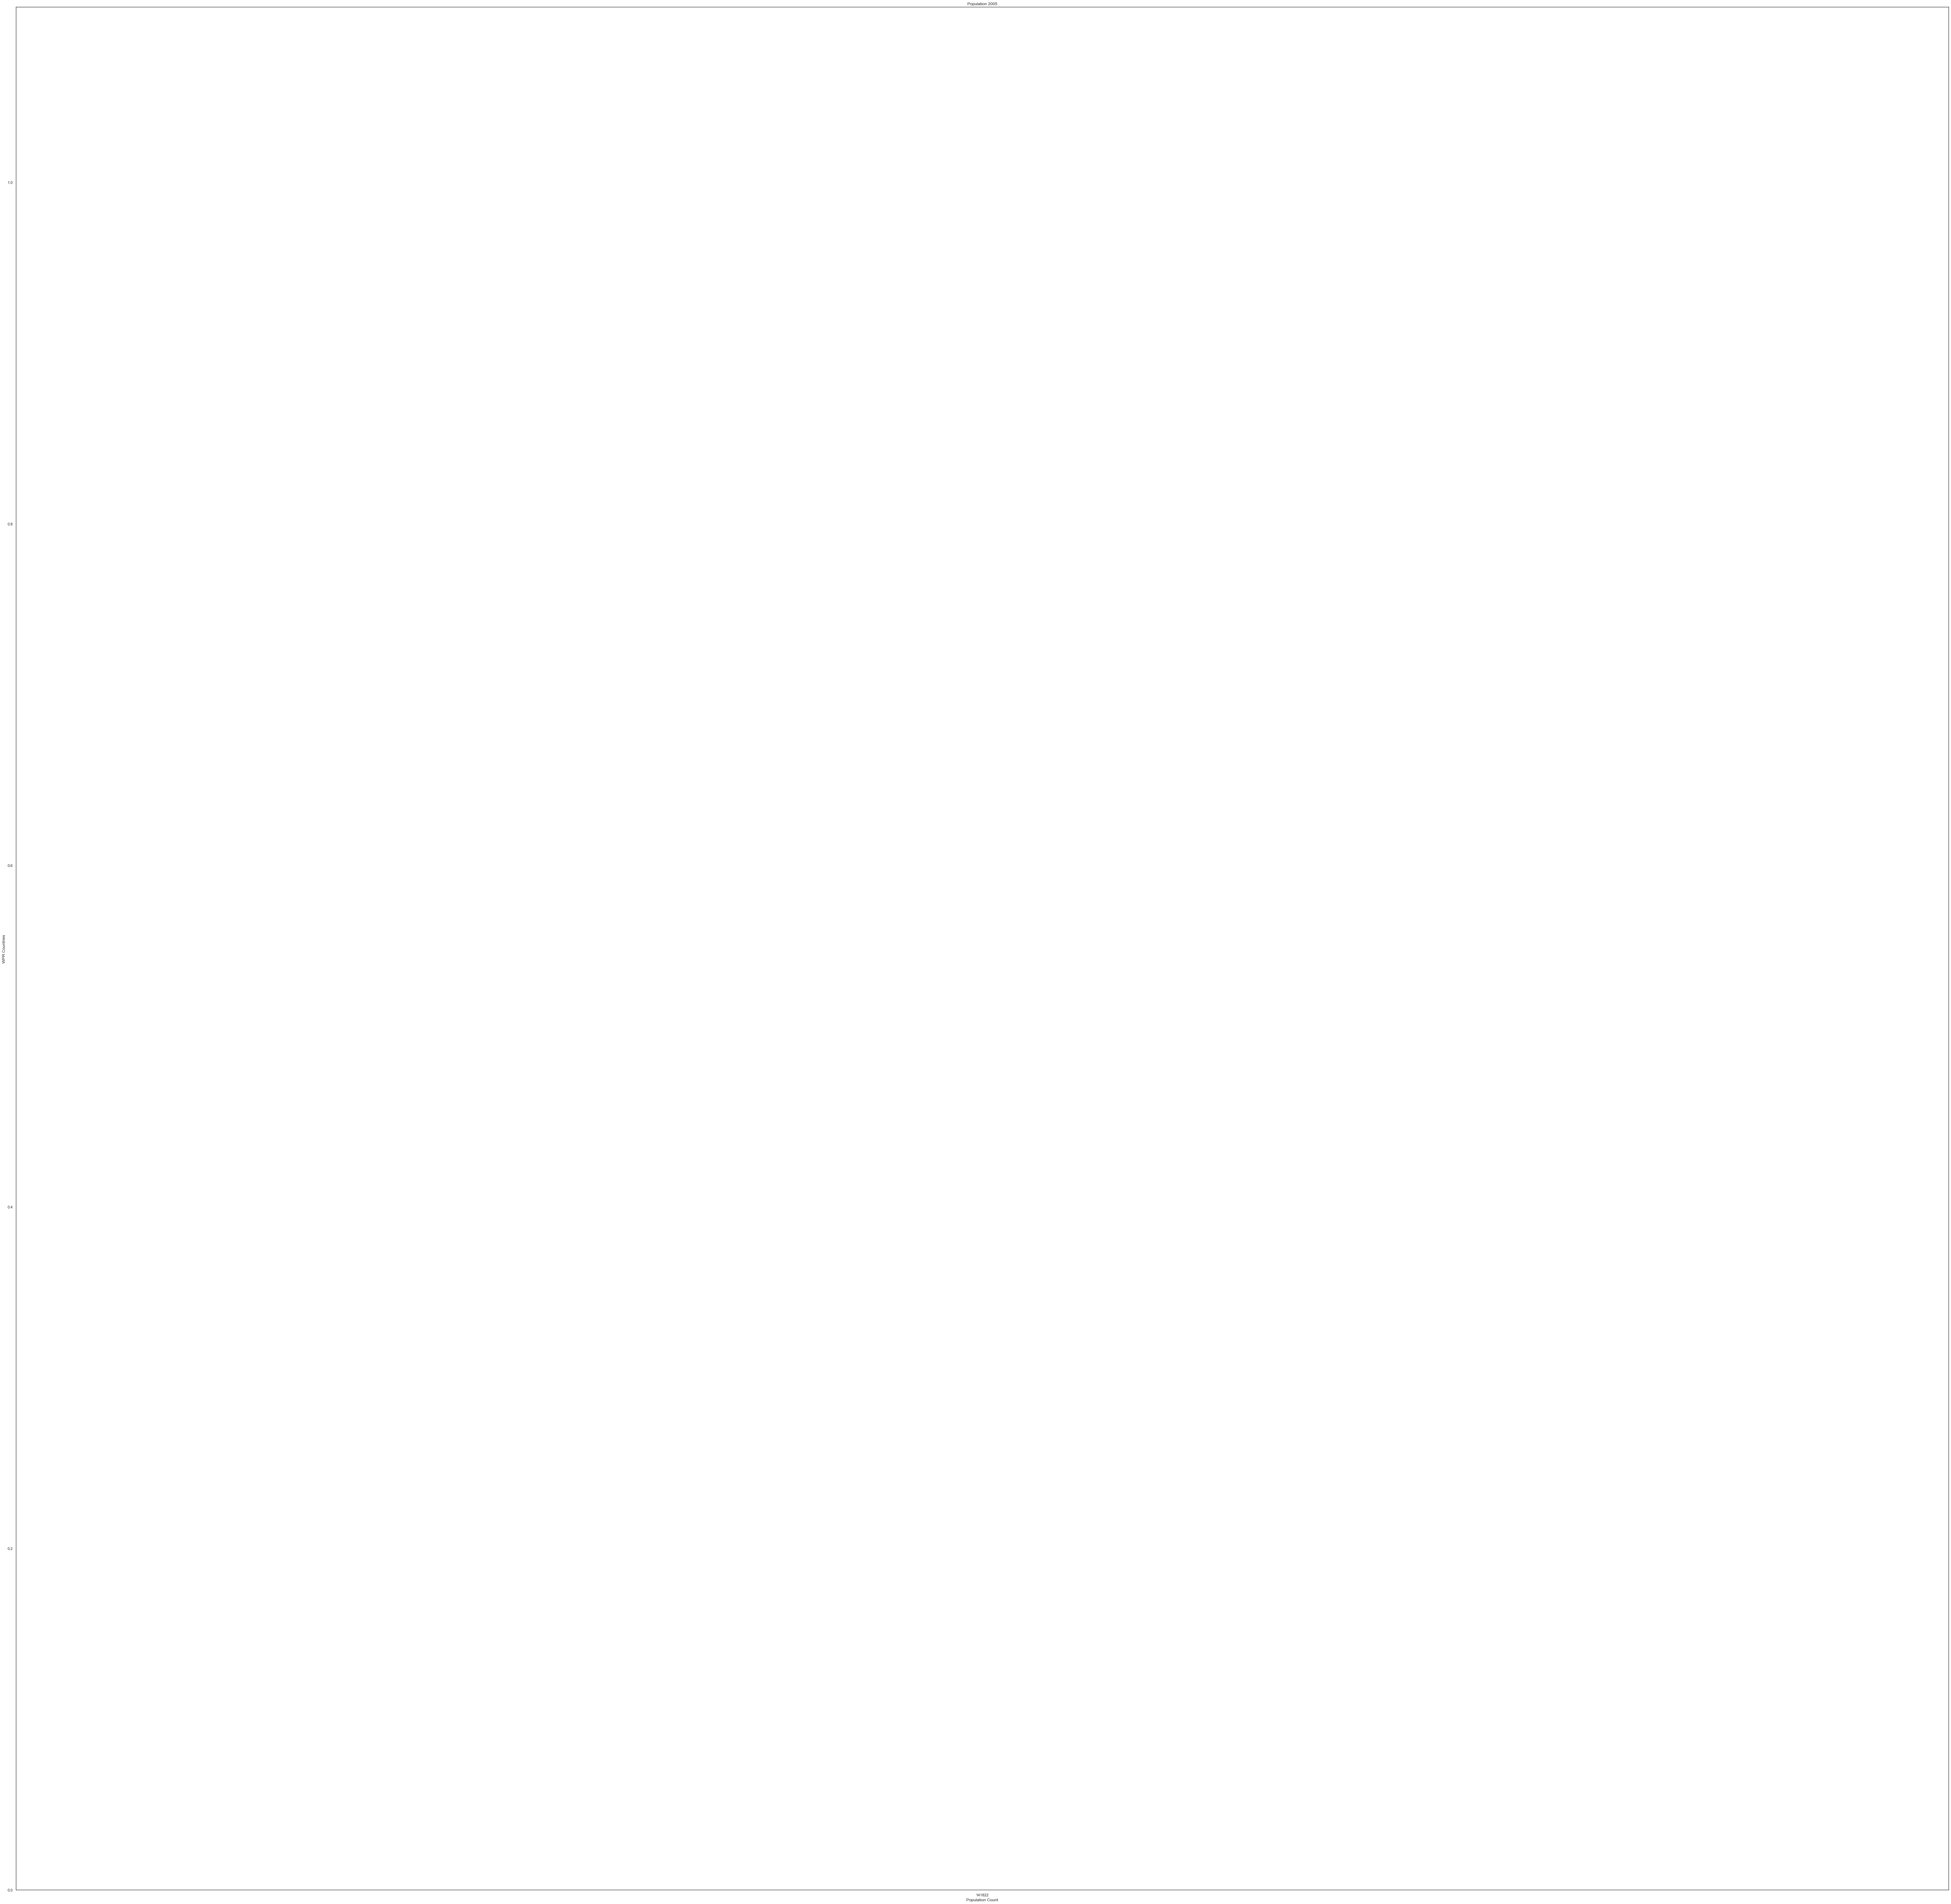

In [102]:
plt.figure(figsize=(100,100))
sns.barplot(y=ind.Population2005,x=ban.Population2005)
plt.xlabel('Population Count')
plt.ylabel('WPR Countries')
plt.title('Population 2005')
plt.show()

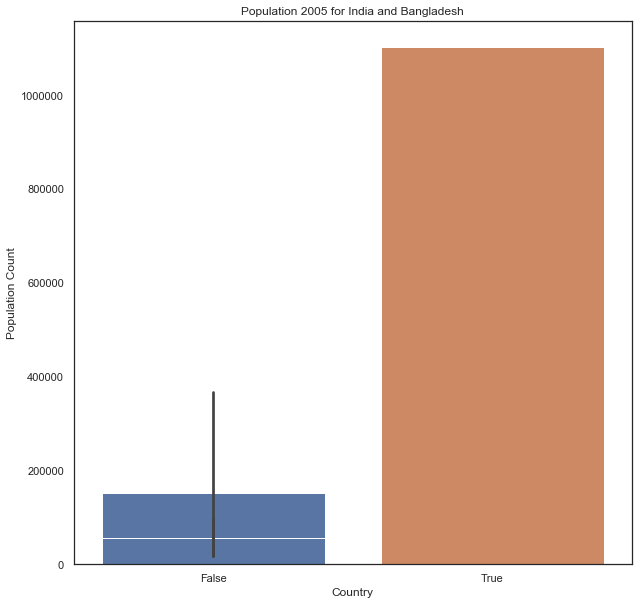

In [103]:
plt.figure(figsize=(10,10))
sns.barplot(y=Who_region_SEAR.Population2005 ,x=Who_region_SEAR.country=='Bangladesh')
sns.barplot(y= Who_region_SEAR.Population2005,x=Who_region_SEAR.country=='India')
plt.xlabel('Country')
plt.ylabel('Population Count')
plt.title('Population 2005 for India and Bangladesh')
plt.show() 

In [104]:
ban.Population2005

13    141822
Name: Population2005, dtype: int64

In [105]:
ind.Population2005

77    1103371
Name: Population2005, dtype: int64

In [106]:
dataframe1 = data.sort_values('country',ascending=False)

In [107]:
dataframe1

,serial,country,WHO_region,Population2005,Population_AGR_1995_2004,PopulationUA_2005,PopulationTFR_2000_2004,ALR_2005,NPSER_Boys_2001,NPSER_Girls_2001,GNIPC_2003,PLBP_1990_2002
191,192,Zimbabwe,AFR,13010,0,36,3.6,90.0,82.4,83.1,62,36.0
190,191,Zambia,AFR,11668,1,37,5.7,62.0,66.4,65.6,380,63.7
189,190,Yemen,EMR,20975,2,26,6.2,49.0,84.0,83.0,520,15.7
188,189,Viet Nam,WPR,84238,1,27,2.3,90.3,84.0,83.0,480,17.7
187,188,Venezuela,AMR,26749,1,88,2.7,93.0,92.0,92.7,3490,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4,5,Angola,AFR,15941,2,37,6.8,66.9,84.0,83.0,740,0.0
3,4,Andorra,EUR,67,0,91,2.0,62.0,84.0,83.0,62,0.0
2,3,Algeria,AFR,32854,1,60,2.5,68.9,96.3,93.7,1890,2.0
1,2,Albania,EUR,3130,0,45,2.3,98.7,84.0,83.0,1740,2.0


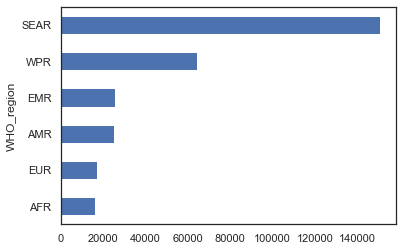

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
x = data.groupby('WHO_region')['Population2005'].mean().sort_values().tail(15)
x.plot(kind='barh')

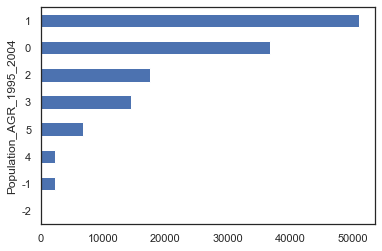

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
x = data.groupby('Population_AGR_1995_2004')['Population2005'].mean().sort_values().tail(15)
x.plot(kind='barh')

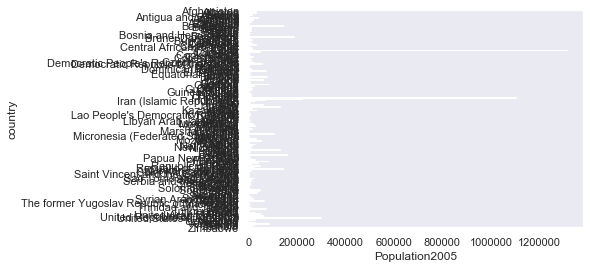

In [110]:
sns.set_style('dark')
ax = sns.barplot(x = data.Population2005, y = data.country, data = data)

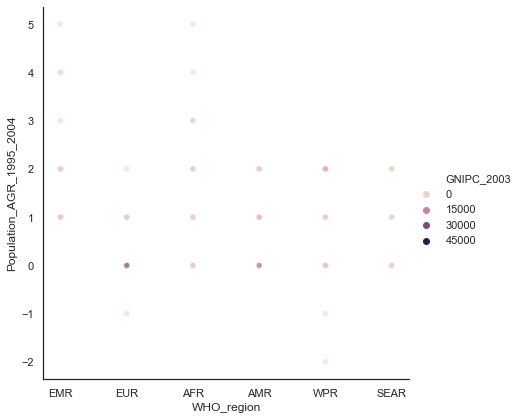

In [133]:
sns.set(style="white")
sns.relplot(x="WHO_region",y="Population_AGR_1995_2004",hue="GNIPC_2003", sizes=(40, 400), alpha=.5, 
            height=6, data=data)
plt.show()

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['WHO_region'].value_counts().plot.pie(explode=[0.1,0.1,0.1,0.1,0.1,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('WHO_region Count')
ax[0].set_ylabel('Count')
sns.countplot('WHO_region',data=data,ax=ax[1])
ax[1].set_title('WHO_region Count')
plt.show()

In [ ]:
g = sns.lmplot(x="WHO_region", y="PopulationTFR_2000_2004", hue="Population_AGR_1995_2004",
               truncate=True, height=5, data=data)

g.set_axis_labels("WHO_region", "PopulationTFR_2000_2004")
plt.show()

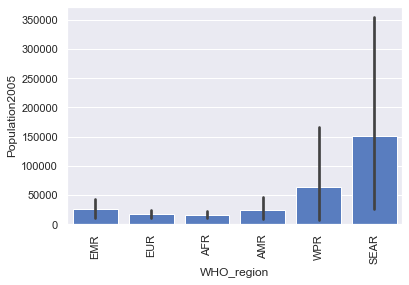

In [113]:
sns.set_color_codes("muted")
sns.barplot(x="WHO_region", y="Population2005", data=data,
            label="Year Suicides", color="b")

plt.xticks(rotation=90)
plt.show()

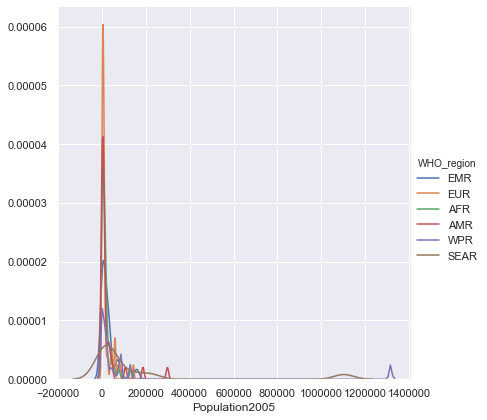

In [115]:
sns.FacetGrid(data, hue="WHO_region", size=6).map(sns.kdeplot, "Population2005").add_legend()
plt.ioff() 
plt.show()

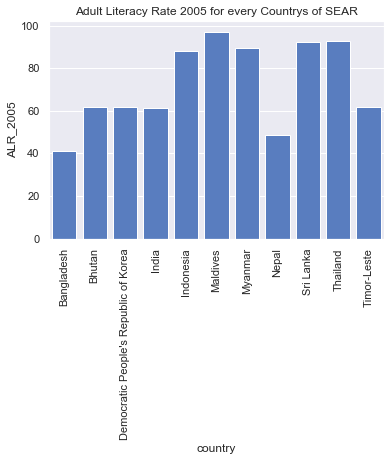

In [129]:
sns.set_color_codes("muted")
sns.barplot(x=Who_region_SEAR.country, y=Who_region_SEAR.ALR_2005, data=data,
            label="", color="b")
plt.title('Adult Literacy Rate 2005 for every Countrys of SEAR') 
plt.xticks(rotation=90)
plt.show() 

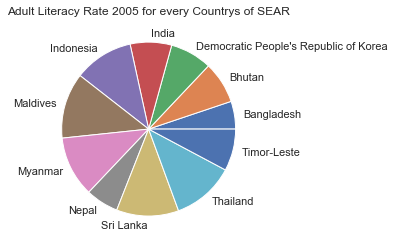

<Figure size 7200x7200 with 0 Axes>

In [131]:
country = Who_region_SEAR.country
population = Who_region_SEAR.ALR_2005
plt.pie(population,labels=country) 
plt.title('Adult Literacy Rate 2005 for every Countrys of SEAR')
plt.get_cmap('bwr')
plt.figure(figsize=(100,100))
plt.show()

In [121]:
x

,serial,country,WHO_region,Population2005,Population_AGR_1995_2004,PopulationUA_2005,PopulationTFR_2000_2004,ALR_2005,NPSER_Boys_2001,NPSER_Girls_2001,GNIPC_2003,PLBP_1990_2002
13,14,Bangladesh,SEAR,141822,1,25,3.2,41.1,85.7,87.5,400,36.0
19,20,Bhutan,SEAR,2163,2,9,4.4,62.0,84.0,83.0,660,0.0
46,47,Democratic People's Republic of Korea,SEAR,22488,0,62,2.0,62.0,84.0,83.0,62,0.0
77,78,India,SEAR,1103371,1,29,3.1,61.3,89.4,75.7,530,34.7
78,79,Indonesia,SEAR,222781,1,48,2.4,87.9,92.6,91.7,810,7.5
103,104,Maldives,SEAR,329,2,30,4.3,97.2,96.0,96.5,2300,0.0
115,116,Myanmar,SEAR,50519,1,31,2.5,89.7,81.8,82.0,62,0.0
118,119,Nepal,SEAR,27133,2,16,3.7,48.6,84.0,83.0,240,37.7
160,161,Sri Lanka,SEAR,20743,0,21,2.0,92.1,84.0,83.0,930,6.6
168,169,Thailand,SEAR,64233,0,33,1.9,92.6,87.5,85.1,2190,2.0


In [124]:
data.ALR_2005

0      62.0
1      98.7
2      68.9
3      62.0
4      66.9
       ... 
187    93.0
188    90.3
189    49.0
190    62.0
191    90.0
Name: ALR_2005, Length: 192, dtype: float64

In [127]:
Who_region_SEAR

,serial,country,WHO_region,Population2005,Population_AGR_1995_2004,PopulationUA_2005,PopulationTFR_2000_2004,ALR_2005,NPSER_Boys_2001,NPSER_Girls_2001,GNIPC_2003,PLBP_1990_2002
13,14,Bangladesh,SEAR,141822,1,25,3.2,41.1,85.7,87.5,400,36.0
19,20,Bhutan,SEAR,2163,2,9,4.4,62.0,84.0,83.0,660,0.0
46,47,Democratic People's Republic of Korea,SEAR,22488,0,62,2.0,62.0,84.0,83.0,62,0.0
77,78,India,SEAR,1103371,1,29,3.1,61.3,89.4,75.7,530,34.7
78,79,Indonesia,SEAR,222781,1,48,2.4,87.9,92.6,91.7,810,7.5
103,104,Maldives,SEAR,329,2,30,4.3,97.2,96.0,96.5,2300,0.0
115,116,Myanmar,SEAR,50519,1,31,2.5,89.7,81.8,82.0,62,0.0
118,119,Nepal,SEAR,27133,2,16,3.7,48.6,84.0,83.0,240,37.7
160,161,Sri Lanka,SEAR,20743,0,21,2.0,92.1,84.0,83.0,930,6.6
168,169,Thailand,SEAR,64233,0,33,1.9,92.6,87.5,85.1,2190,2.0


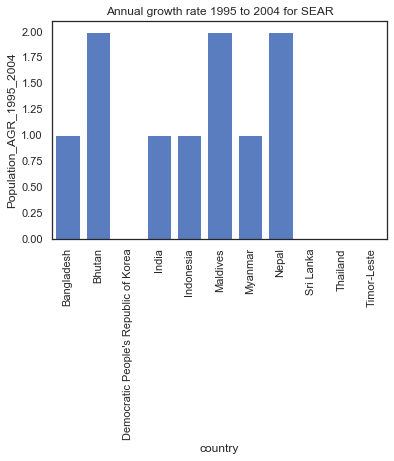

In [142]:
sns.set_color_codes("muted")
sns.barplot(x=Who_region_SEAR.country, y=Who_region_SEAR.Population_AGR_1995_2004, data=data,
            label="Year Suicides", color="b")
plt.title('Annual growth rate 1995 to 2004 for SEAR')
plt.xticks(rotation=90)
plt.show()

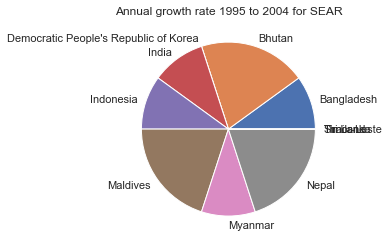

<Figure size 7200x7200 with 0 Axes>

In [143]:
country = Who_region_SEAR.country
population = Who_region_SEAR.Population_AGR_1995_2004
plt.pie(population,labels=country) 
plt.title('Annual growth rate 1995 to 2004 for SEAR')
plt.get_cmap('bwr')
plt.figure(figsize=(100,100))
plt.show()

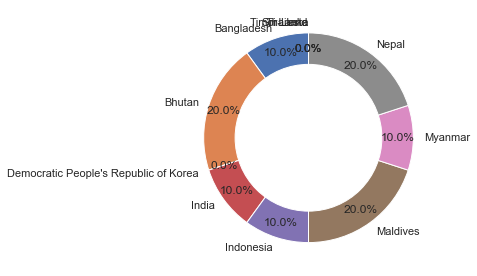

In [145]:
plt.pie(Who_region_SEAR.Population_AGR_1995_2004,labels= Who_region_SEAR.country,  autopct='%1.1f%%', startangle=90, pctdistance=.85)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.show()

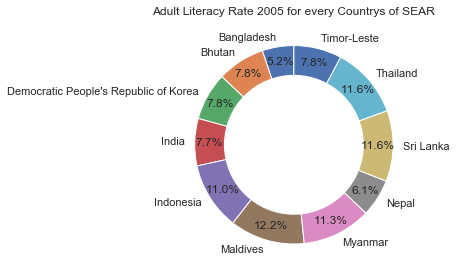

In [147]:
plt.pie(Who_region_SEAR.ALR_2005,labels= Who_region_SEAR.country,  autopct='%1.1f%%', startangle=90, pctdistance=.85)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
plt.title('Adult Literacy Rate 2005 for every Countrys of SEAR')
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.show()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

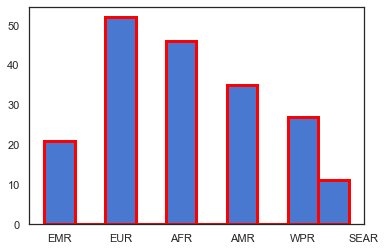

In [148]:
plt.hist(data.WHO_region, align='left', color='b', edgecolor='red', linewidth=3)
plt.xlabel(data.WHO_region)
plt.ylabel(data.Population_AGR_1995_2004)
plt.title('Population annual growth rate(%) 1995-2004')
plt.show()

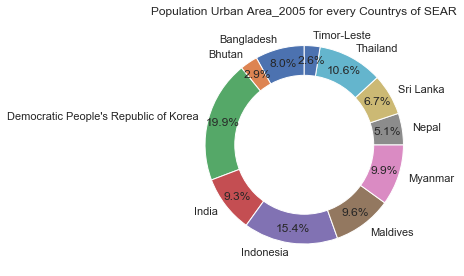

In [150]:
plt.pie(Who_region_SEAR.PopulationUA_2005,labels= Who_region_SEAR.country,  autopct='%1.1f%%', startangle=90, pctdistance=.85)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
plt.title('Population Urban Area_2005 for every Countrys of SEAR')
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.show()

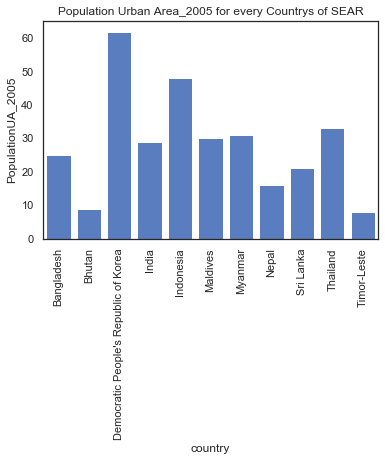

In [151]:
sns.set_color_codes("muted")
sns.barplot(x=Who_region_SEAR.country, y=Who_region_SEAR.PopulationUA_2005, data=data,
            label="Year Suicides", color="b")
plt.title('Population Urban Area_2005 for every Countrys of SEAR')
plt.xticks(rotation=90)
plt.show()

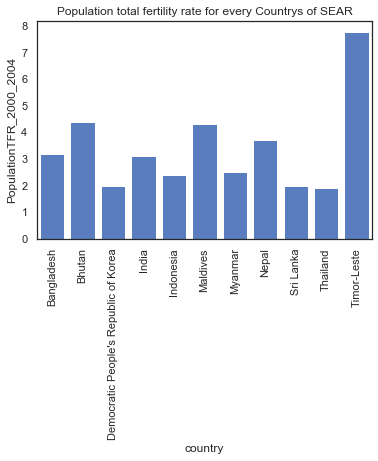

In [155]:
sns.set_color_codes("muted")
sns.barplot(x=Who_region_SEAR.country, y=Who_region_SEAR.PopulationTFR_2000_2004, data=data,
            label="Year Suicides", color="b")
plt.title('Population total fertility rate for every Countrys of SEAR')
plt.xticks(rotation=90)
plt.show()

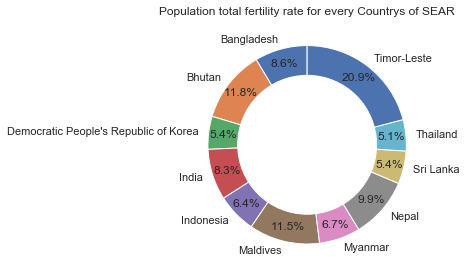

In [154]:
plt.pie(Who_region_SEAR.PopulationTFR_2000_2004,labels= Who_region_SEAR.country,  autopct='%1.1f%%', startangle=90, pctdistance=.85)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
plt.title('Population total fertility rate for every Countrys of SEAR')
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.show()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

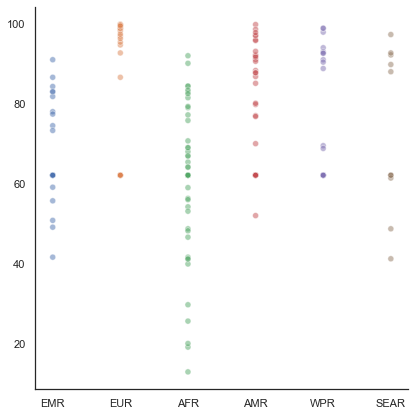

In [157]:
sns.set(style="white")
sns.relplot(x=data.WHO_region,y=data.ALR_2005,hue=data.WHO_region, sizes=(40, 400), alpha=.5, 
            height=6, data=data)
plt.show()

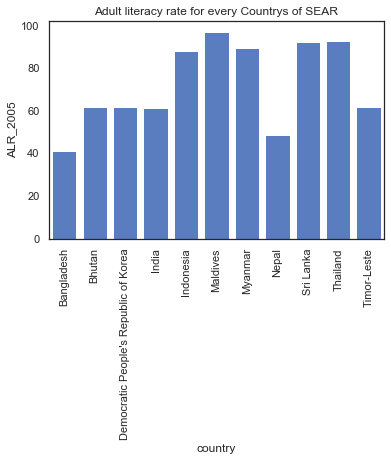

In [159]:
sns.set_color_codes("muted")
sns.barplot(x=Who_region_SEAR.country, y=Who_region_SEAR.ALR_2005, data=data,
            label="Year Suicides", color="b")
plt.title('Adult literacy rate for every Countrys of SEAR')
plt.xticks(rotation=90)
plt.show()

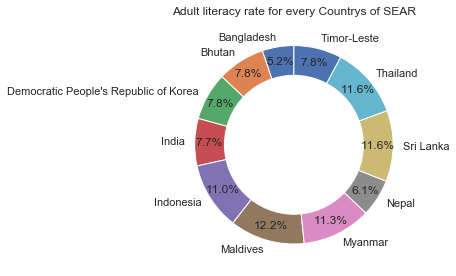

In [160]:
plt.pie(Who_region_SEAR.ALR_2005,labels= Who_region_SEAR.country,  autopct='%1.1f%%', startangle=90, pctdistance=.85)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
plt.title('Adult literacy rate for every Countrys of SEAR')
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.show()

In [ ]:
Population living below poverty line

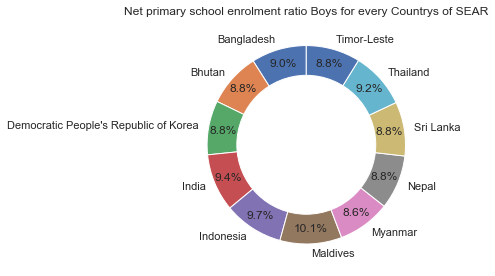

In [161]:
plt.pie(Who_region_SEAR.NPSER_Boys_2001,labels= Who_region_SEAR.country,  autopct='%1.1f%%', startangle=90, pctdistance=.85)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
plt.title('Net primary school enrolment ratio Boys for every Countrys of SEAR')
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.show()

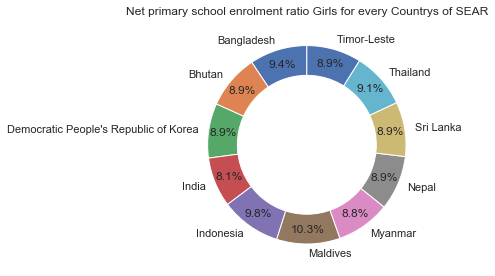

In [163]:
plt.pie(Who_region_SEAR.NPSER_Girls_2001,labels= Who_region_SEAR.country,  autopct='%1.1f%%', startangle=90, pctdistance=.85)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
plt.title('Net primary school enrolment ratio Girls for every Countrys of SEAR')
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.show()

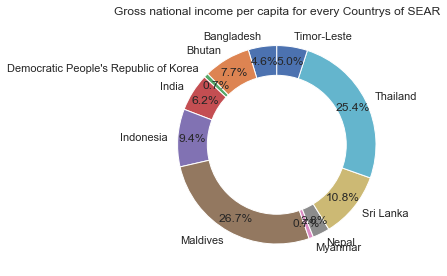

In [164]:
plt.pie(Who_region_SEAR.GNIPC_2003,labels= Who_region_SEAR.country,  autopct='%1.1f%%', startangle=90, pctdistance=.85)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
plt.title('Gross national income per capita for every Countrys of SEAR')
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.show()

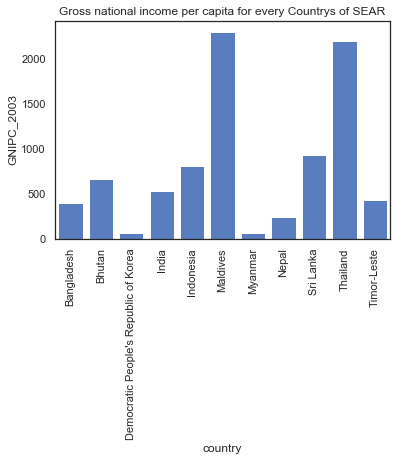

In [165]:
sns.set_color_codes("muted")
sns.barplot(x=Who_region_SEAR.country, y=Who_region_SEAR.GNIPC_2003, data=data,
            label="Year Suicides", color="b")
plt.title('Gross national income per capita for every Countrys of SEAR')
plt.xticks(rotation=90)
plt.show()

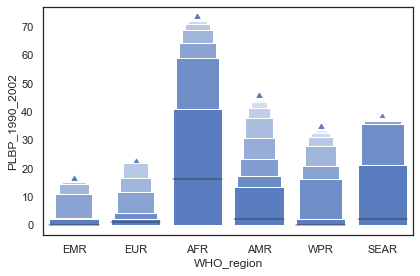

In [169]:
sns.boxenplot(x=data.WHO_region, y=data.PLBP_1990_2002,
              color="b",
              scale="linear", data=data)
plt.tight_layout()
plt.show()

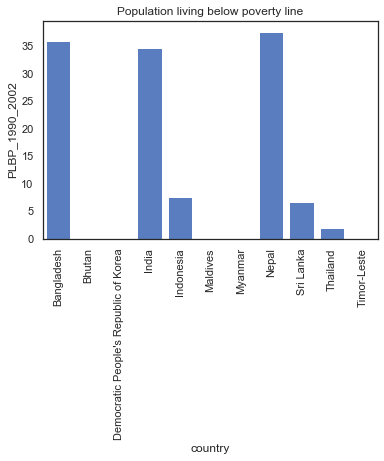

In [170]:
sns.set_color_codes("muted")
sns.barplot(x=Who_region_SEAR.country, y=Who_region_SEAR.PLBP_1990_2002, data=data,
            label="Year Suicides", color="b")
plt.title('Population living below poverty line')
plt.xticks(rotation=90)
plt.show()

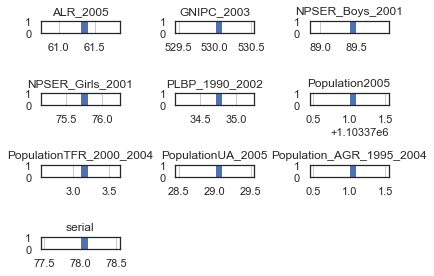

In [171]:
data[data['country']=='India'].hist()
plt.tight_layout()
plt.title("All Over Info")
plt.show()

In [ ]:
World Health Organization